In [18]:
import glob
import json
import re
import pandas as pd 

In [35]:
import os

In [68]:
def get_metrics(folder):
    metrics = glob.glob(os.path.join('../tasks/quote_prediction/results/', folder, 'call*'))
    all_results = {}
    for m in metrics:
        with open(m) as f:
            results = json.load(f)
            step = int(re.search('state-(\d+)', m)[1])
            all_results[step] = results

    all_results_df = pd.DataFrame(all_results).T.sort_index()
    return all_results_df

In [30]:
acc_columns = list(filter(lambda x: ('accuracy' in x) and ('ones-accuracy' not in x) , all_results_df))

<AxesSubplot: >

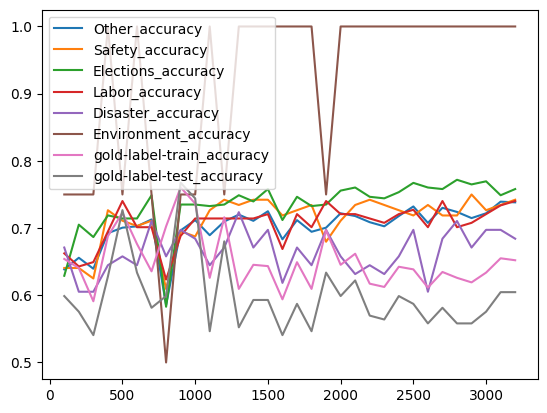

In [34]:
all_results_df[acc_columns].plot()

In [94]:
top__source_text_df = get_metrics('big-bird-base__ablated-top__source-and-text')
top__text_df = get_metrics('big-bird-base__ablated-top__text')
highperc__source_text_df = get_metrics('big-bird-base__ablated-high-perc__source-and-text')
highperc__text_df = get_metrics('big-bird-base__ablated-high-perc__text')
any__source_text_df = get_metrics('big-bird-base__ablated-any__source-and-text')
any__text_df = get_metrics('big-bird-base__ablated-any__text')

In [96]:
top__source_text_df[acc_columns].max(axis=0)

Other_accuracy               0.739308
Safety_accuracy                  0.75
Elections_accuracy           0.771889
Labor_accuracy                0.74026
Disaster_accuracy            0.723684
Environment_accuracy              1.0
gold-label-train_accuracy    0.760659
gold-label-test_accuracy     0.767442
dtype: object

<AxesSubplot: >

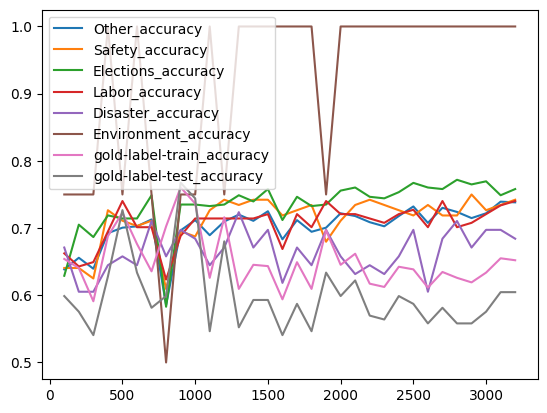

In [97]:
top__source_text_df[acc_columns].plot()

In [57]:
top__text_df[acc_columns].max(axis=0)

Other_accuracy               0.742363
Safety_accuracy               0.78125
Elections_accuracy           0.785714
Labor_accuracy               0.746753
Disaster_accuracy            0.723684
Environment_accuracy              1.0
gold-label-train_accuracy    0.693798
gold-label-test_accuracy     0.662791
dtype: object

<AxesSubplot: >

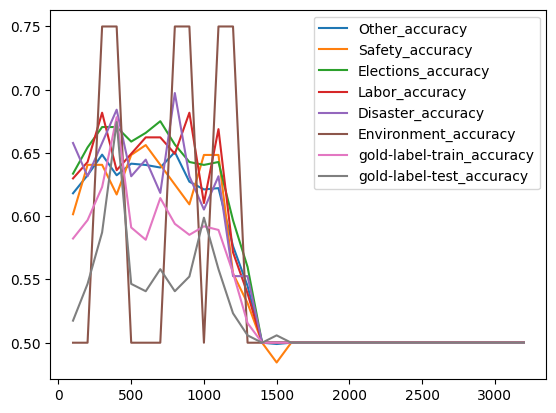

In [70]:
highperc__source_text_df[acc_columns].plot()

In [76]:
highperc__source_text_df[acc_columns].max() # .loc[900:1200].mean()

Other_accuracy               0.650713
Safety_accuracy               0.65625
Elections_accuracy           0.675115
Labor_accuracy               0.681818
Disaster_accuracy            0.697368
Environment_accuracy             0.75
gold-label-train_accuracy    0.678295
gold-label-test_accuracy     0.674419
dtype: object

In [81]:
highperc__text_df[acc_columns].max()

Other_accuracy               0.638493
Safety_accuracy               0.65625
Elections_accuracy           0.658986
Labor_accuracy               0.681818
Disaster_accuracy            0.657895
Environment_accuracy              1.0
gold-label-train_accuracy    0.648256
gold-label-test_accuracy     0.575581
dtype: object

In [93]:
any__source_text_df[acc_columns].max()

Other_accuracy               0.593686
Safety_accuracy               0.59375
Elections_accuracy           0.610599
Labor_accuracy               0.623377
Disaster_accuracy            0.618421
Environment_accuracy             0.75
gold-label-train_accuracy    0.639535
gold-label-test_accuracy     0.598837
dtype: object

<AxesSubplot: >

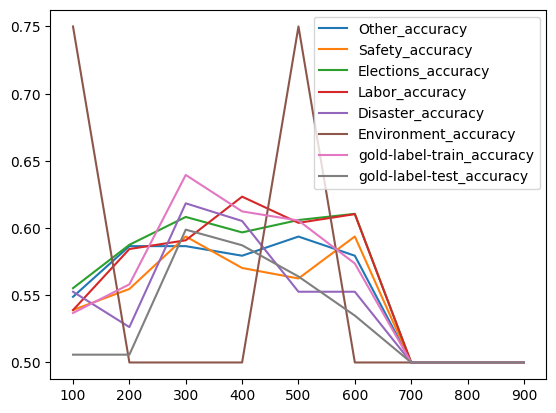

In [87]:
any__source_text_df[acc_columns].plot()

In [95]:
any__text_df[acc_columns].max()

Other_accuracy               0.575356
Safety_accuracy              0.585938
Elections_accuracy            0.56682
Labor_accuracy               0.558442
Disaster_accuracy            0.539474
Environment_accuracy              0.5
gold-label-train_accuracy    0.561047
gold-label-test_accuracy      0.52907
dtype: object

# Quote Detection

In [101]:
import jsonlines

In [102]:
results = list(jsonlines.open('../tasks/quote_detection/other_platforms/quote-detection-no-background.jsonl'))

In [106]:
orig_input = list(jsonlines.open('../tasks/quote_detection/other_platforms/data/training_data_background_excluded.jsonl'))

In [110]:
orig_test_input = list(filter(lambda x: x['split'] == 'test', orig_input))

In [111]:
test_results = 
orig_test_input[0]

{'data': [{'sent': 'In March , as small businesses across the country were shutting down amid the spreading coronavirus pandemic , Shanel Fields was about to open one up .  ',
   'label': True,
   'quote_type': 'QUOTE'},
  {'sent': 'For Ms. Fields , the timing could n’t have been better .',
   'label': False,
   'quote_type': 'BACKGROUND'},
  {'sent': 'Her company , MD Ally , allows 911 dispatchers and other responders to route nonemergency calls and patients to virtual doctors , to help local governments improve their emergency response systems .  ',
   'label': False,
   'quote_type': 'BACKGROUND'},
  {'sent': '“', 'label': False, 'quote_type': ''},
  {'sent': 'Something that a lot of people do n’t know is that more than half of calls that go to 911 are nonemergency , ” said Ms. Fields , whose father ’s experiences as a volunteer emergency medical worker sparked the idea .',
   'label': True,
   'quote_type': 'QUOTE'},
  {'sent': '“', 'label': False, 'quote_type': 'QUOTE'},
  {'sent'

In [103]:
results[0]

[{'pred': -6.710246562957764,
  'sent': 'In March , as small businesses across the country were shutting down amid the spreading coronavirus pandemic , Shanel Fields was about to open one up .  ',
  'label': True},
 {'pred': -5.1076273918151855,
  'sent': 'For Ms. Fields , the timing could n’t have been better .',
  'label': False},
 {'pred': -9.749329566955566,
  'sent': 'Her company , MD Ally , allows 911 dispatchers and other responders to route nonemergency calls and patients to virtual doctors , to help local governments improve their emergency response systems .  ',
  'label': False},
 {'pred': -1.2607908248901367, 'sent': '“', 'label': False},
 {'pred': 7.604095935821533,
  'sent': 'Something that a lot of people do n’t know is that more than half of calls that go to 911 are nonemergency , ” said Ms. Fields , whose father ’s experiences as a volunteer emergency medical worker sparked the idea .',
  'label': True},
 {'pred': -1.2607908248901367, 'sent': '“', 'label': False},
 {'p